<a href="https://colab.research.google.com/github/DalbbomPaPa/bims/blob/master/bims_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras


import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,666 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
plt.rcParams['font.family'] = 'NanumBarunGothic'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/only_cell_merge.csv")
df

,Unnamed: 0,남청주E3/없음/LTE-1조_셀저항1,남청주E3/없음/LTE-1조_셀저항2,남청주E3/없음/LTE-1조_셀저항3,남청주E3/없음/LTE-1조_셀저항4,남청주E3/없음/LTE-1조_셀저항5,남청주E3/없음/LTE-1조_셀저항6,남청주E3/없음/LTE-1조_셀저항7,남청주E3/없음/LTE-1조_셀저항8,남청주E3/없음/LTE-1조_셀저항9,...,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항15,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항16,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항17,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항18,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항19,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항20,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항21,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항22,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항23,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항24
0,1,0.332,0.275,0.293,0.301,0.299,0.289,0.299,0.277,0.297,...,0.249,0.247,0.263,0.241,0.249,0.252,0.263,0.260,0.267,0.267
1,2,0.332,0.276,0.293,0.302,0.298,0.291,0.300,0.279,0.298,...,0.247,0.247,0.262,0.242,0.250,0.250,0.258,0.257,0.266,0.266
2,3,0.331,0.278,0.292,0.303,0.297,0.290,0.301,0.279,0.300,...,0.248,0.247,0.262,0.243,0.250,0.248,0.257,0.256,0.267,0.266
3,4,0.331,0.279,0.292,0.304,0.297,0.291,0.301,0.279,0.301,...,0.249,0.248,0.262,0.244,0.249,0.249,0.255,0.259,0.267,0.266
4,5,0.332,0.279,0.291,0.306,0.296,0.289,0.300,0.279,0.300,...,0.252,0.249,0.261,0.243,0.247,0.249,0.256,0.259,0.264,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,0.339,0.291,0.291,0.303,0.312,0.295,0.312,0.281,0.314,...,0.279,0.282,0.250,0.251,0.278,0.272,0.275,0.274,0.289,0.286
1396,1397,0.339,0.289,0.295,0.304,0.311,0.296,0.311,0.280,0.313,...,0.280,0.283,0.254,0.251,0.278,0.274,0.276,0.274,0.289,0.286
1397,1398,0.341,0.290,0.296,0.306,0.311,0.297,0.315,0.282,0.314,...,0.280,0.280,0.257,0.252,0.282,0.273,0.276,0.275,0.288,0.288
1398,1399,0.341,0.293,0.297,0.307,0.310,0.299,0.315,0.285,0.313,...,0.279,0.277,0.256,0.251,0.278,0.272,0.275,0.278,0.292,0.288


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df

,남청주E3/없음/LTE-1조_셀저항1,남청주E3/없음/LTE-1조_셀저항2,남청주E3/없음/LTE-1조_셀저항3,남청주E3/없음/LTE-1조_셀저항4,남청주E3/없음/LTE-1조_셀저항5,남청주E3/없음/LTE-1조_셀저항6,남청주E3/없음/LTE-1조_셀저항7,남청주E3/없음/LTE-1조_셀저항8,남청주E3/없음/LTE-1조_셀저항9,남청주E3/없음/LTE-1조_셀저항10,...,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항15,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항16,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항17,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항18,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항19,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항20,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항21,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항22,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항23,통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항24
0,0.332,0.275,0.293,0.301,0.299,0.289,0.299,0.277,0.297,0.285,...,0.249,0.247,0.263,0.241,0.249,0.252,0.263,0.260,0.267,0.267
1,0.332,0.276,0.293,0.302,0.298,0.291,0.300,0.279,0.298,0.286,...,0.247,0.247,0.262,0.242,0.250,0.250,0.258,0.257,0.266,0.266
2,0.331,0.278,0.292,0.303,0.297,0.290,0.301,0.279,0.300,0.285,...,0.248,0.247,0.262,0.243,0.250,0.248,0.257,0.256,0.267,0.266
3,0.331,0.279,0.292,0.304,0.297,0.291,0.301,0.279,0.301,0.285,...,0.249,0.248,0.262,0.244,0.249,0.249,0.255,0.259,0.267,0.266
4,0.332,0.279,0.291,0.306,0.296,0.289,0.300,0.279,0.300,0.286,...,0.252,0.249,0.261,0.243,0.247,0.249,0.256,0.259,0.264,0.266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.339,0.291,0.291,0.303,0.312,0.295,0.312,0.281,0.314,0.297,...,0.279,0.282,0.250,0.251,0.278,0.272,0.275,0.274,0.289,0.286
1396,0.339,0.289,0.295,0.304,0.311,0.296,0.311,0.280,0.313,0.297,...,0.280,0.283,0.254,0.251,0.278,0.274,0.276,0.274,0.289,0.286
1397,0.341,0.290,0.296,0.306,0.311,0.297,0.315,0.282,0.314,0.298,...,0.280,0.280,0.257,0.252,0.282,0.273,0.276,0.275,0.288,0.288
1398,0.341,0.293,0.297,0.307,0.310,0.299,0.315,0.285,0.313,0.298,...,0.279,0.277,0.256,0.251,0.278,0.272,0.275,0.278,0.292,0.288


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
남청주E3/없음/LTE-1조_셀저항1,1400.0,0.336284,0.007020,0.221,0.333,0.337,0.33900,0.353
남청주E3/없음/LTE-1조_셀저항2,1400.0,0.284270,0.007968,0.190,0.279,0.284,0.28800,0.307
남청주E3/없음/LTE-1조_셀저항3,1400.0,0.295559,0.006343,0.193,0.293,0.296,0.29800,0.311
남청주E3/없음/LTE-1조_셀저항4,1400.0,0.306663,0.006576,0.200,0.304,0.307,0.31000,0.339
남청주E3/없음/LTE-1조_셀저항5,1400.0,0.306899,0.007842,0.201,0.303,0.307,0.31100,0.328
...,...,...,...,...,...,...,...,...
통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항20,1400.0,0.272529,0.013297,0.243,0.262,0.276,0.28200,0.304
통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항21,1400.0,0.275679,0.012474,0.249,0.266,0.278,0.28500,0.302
통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항22,1400.0,0.275740,0.012785,0.251,0.265,0.279,0.28600,0.305
통신센터(IDC)_A_M_5/없음/ROADM-3조_셀저항23,1400.0,0.288598,0.015224,0.254,0.275,0.294,0.30025,0.316


## 시퀀스 투 시퀀스 모델 생성

In [ ]:
# 트레인, 테스트 데이터 셋 생성 함수
def seqRNN_data(data,steps):

  n1 = data.shape[0]
  n2 = data.shape[1]

  X_train = data[:int(n1*0.7), :n2-steps]
  X_valid = data[int(n1*0.7):int(n1*0.9), :n2-steps]
  X_test = data[int(n1*0.9):, :n2-steps]
  Y = Y = np.empty((n1, n2-steps, steps))

  for step_ahead in range(1, steps+1):
      Y[..., step_ahead - 1] = data[..., step_ahead:step_ahead + n2-steps, 0]
  Y_train = Y[:int(n1*0.7)]
  Y_valid = Y[int(n1*0.7):int(n1*0.9)]
  Y_test = Y[int(n1*0.9):]
  return X_train, Y_train, X_valid, Y_valid, X_test, Y_test
  
def df_to_array(df):
  df_array = np.array(df.transpose())
  df_array = df_array.reshape(df_array.shape[0], df_array.shape[1], 1)
  return df_array


In [ ]:
df1 = df.iloc[:, :1000]
df1

,남청주E3/없음/LTE-1조_셀저항1,남청주E3/없음/LTE-1조_셀저항2,남청주E3/없음/LTE-1조_셀저항3,남청주E3/없음/LTE-1조_셀저항4,남청주E3/없음/LTE-1조_셀저항5,남청주E3/없음/LTE-1조_셀저항6,남청주E3/없음/LTE-1조_셀저항7,남청주E3/없음/LTE-1조_셀저항8,남청주E3/없음/LTE-1조_셀저항9,남청주E3/없음/LTE-1조_셀저항10,...,양재_A_M_5G/없음/TDX-100-1조_셀저항7,양재_A_M_5G/없음/TDX-100-1조_셀저항8,양재_A_M_5G/없음/TDX-100-1조_셀저항9,양재_A_M_5G/없음/TDX-100-1조_셀저항10,양재_A_M_5G/없음/TDX-100-1조_셀저항11,양재_A_M_5G/없음/TDX-100-1조_셀저항12,양재_A_M_5G/없음/TDX-100-1조_셀저항13,양재_A_M_5G/없음/TDX-100-1조_셀저항14,양재_A_M_5G/없음/TDX-100-1조_셀저항15,양재_A_M_5G/없음/TDX-100-1조_셀저항16
0,0.332,0.275,0.293,0.301,0.299,0.289,0.299,0.277,0.297,0.285,...,0.159,0.173,0.189,0.167,0.162,0.150,0.151,0.163,0.150,0.164
1,0.332,0.276,0.293,0.302,0.298,0.291,0.300,0.279,0.298,0.286,...,0.158,0.174,0.184,0.165,0.164,0.146,0.148,0.161,0.157,0.164
2,0.331,0.278,0.292,0.303,0.297,0.290,0.301,0.279,0.300,0.285,...,0.155,0.171,0.185,0.167,0.165,0.143,0.139,0.161,0.159,0.164
3,0.331,0.279,0.292,0.304,0.297,0.291,0.301,0.279,0.301,0.285,...,0.152,0.172,0.182,0.168,0.165,0.145,0.138,0.165,0.160,0.166
4,0.332,0.279,0.291,0.306,0.296,0.289,0.300,0.279,0.300,0.286,...,0.155,0.173,0.186,0.169,0.166,0.148,0.136,0.163,0.161,0.164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.339,0.291,0.291,0.303,0.312,0.295,0.312,0.281,0.314,0.297,...,0.163,0.199,0.201,0.178,0.188,0.192,0.204,0.180,0.172,0.176
1396,0.339,0.289,0.295,0.304,0.311,0.296,0.311,0.280,0.313,0.297,...,0.165,0.200,0.202,0.179,0.190,0.191,0.195,0.173,0.172,0.172
1397,0.341,0.290,0.296,0.306,0.311,0.297,0.315,0.282,0.314,0.298,...,0.167,0.202,0.201,0.180,0.190,0.192,0.187,0.172,0.173,0.174
1398,0.341,0.293,0.297,0.307,0.310,0.299,0.315,0.285,0.313,0.298,...,0.163,0.197,0.205,0.181,0.187,0.192,0.194,0.175,0.176,0.176


In [ ]:
df_array = df_to_array(df1)
df_array.shape

(1000, 1400, 1)

In [ ]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = seqRNN_data(df_array,360)

In [ ]:
X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape, X_test.shape, Y_test.shape

((700, 1040, 1),
 (700, 1040, 360),
 (200, 1040, 1),
 (200, 1040, 360),
 (100, 1040, 1),
 (100, 1040, 360))

In [ ]:
# def last_time_step_mse(Y_true, Y_pred):
#      return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(1040, return_sequences=True, input_shape=[None, 1]),
    # keras.layers.LSTM(720, return_sequences=True, input_shape=[X_train.shape[1], X_train.shape[2]]),
    keras.layers.LSTM(1040, return_sequences=True),
    # keras.layers.TimeDistributed(keras.layers.Dense(720)),
    keras.layers.Dense(720),
    keras.layers.Dense(360)
])
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

model.compile(loss="mse", optimizer="adam"
# , metrics=[last_time_step_mse]
)
history = model.fit(X_train, Y_train, epochs=50,
                    validation_data=(X_valid, Y_valid)
                    ,callbacks=[es]
                    )

Epoch 1/50
22/22 [==============================] - 34s 1s/step - loss: 0.0438 - val_loss: 0.0078
Epoch 2/50
22/22 [==============================] - 27s 1s/step - loss: 0.0073 - val_loss: 0.0045
Epoch 3/50
22/22 [==============================] - 29s 1s/step - loss: 0.0060 - val_loss: 0.0044
Epoch 4/50
22/22 [==============================] - 31s 1s/step - loss: 0.0056 - val_loss: 0.0045
Epoch 5/50
22/22 [==============================] - 30s 1s/step - loss: 0.0054 - val_loss: 0.0044
Epoch 6/50
22/22 [==============================] - 30s 1s/step - loss: 0.0051 - val_loss: 0.0046
Epoch 7/50
22/22 [==============================] - 30s 1s/step - loss: 0.0049 - val_loss: 0.0042
Epoch 8/50
22/22 [==============================] - 30s 1s/step - loss: 0.0050 - val_loss: 0.0047
Epoch 9/50
22/22 [==============================] - 30s 1s/step - loss: 0.0057 - val_loss: 0.0046
Epoch 10/50
22/22 [==============================] - 30s 1s/step - loss: 0.0050 - val_loss: 0.0041
Epoch 11/50
22/22 [

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plt.plot(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "b", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "r", label="Forecast")
    plt.axis([0, n_steps + ahead, 0, 0.5])
    plt.legend(fontsize=14)
    plt.grid()
    plt.show()

In [ ]:
X_new = np.array(df.iloc[:,400])[:-360].reshape(1,1040,1)
Y_new = np.array(df.iloc[:,400])[-360:].reshape(1,360,1)

7/7 [==============================] - 2s 312ms/step - loss: 0.0044
0.0043694679625332355


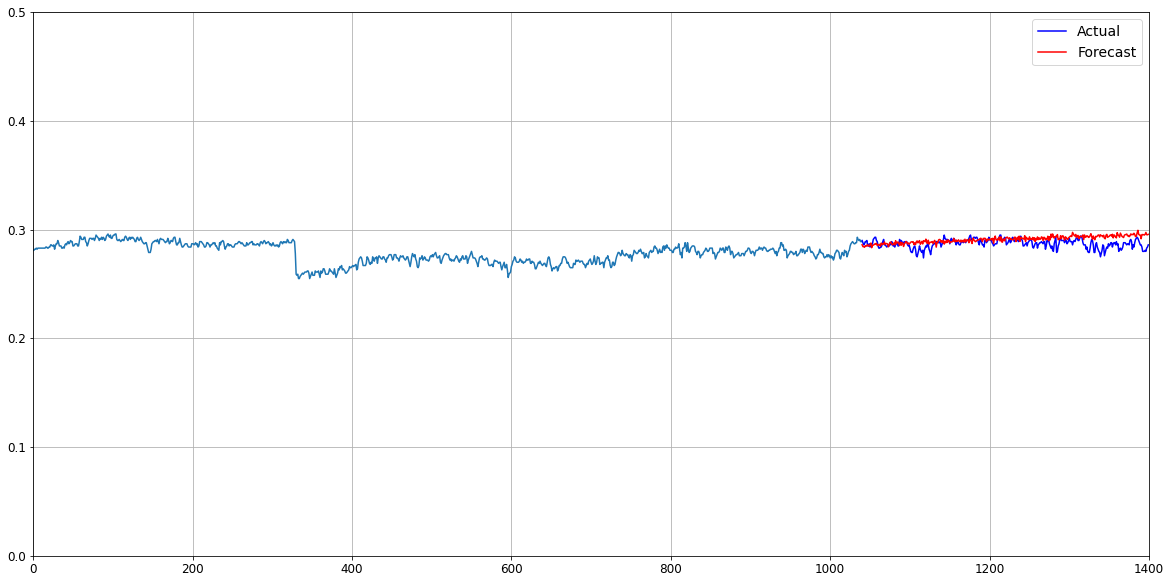

In [ ]:
print(model.evaluate(X_valid, Y_valid))
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]


plt.figure(figsize=(20,10))
plot_multiple_forecasts(X_new, Y_new, Y_pred)



In [ ]:
import openpyxl
jangi_df = pd.read_excel("/content/drive/MyDrive/김포_장기_통신용1조.xlsx",engine="openpyxl")

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
jangi_df.drop(jangi_df[jangi_df["NO-DATA"]=="통신이상"].index, inplace=True)

In [ ]:
np.array(jangi_df["셀저항1"]).shape

(2037,)

In [ ]:
jangi_df.shape[0]-360

1677

In [ ]:
X_new = np.array(jangi_df["셀저항5"])[:-360].reshape(1,1677,1)
Y_new = np.array(jangi_df["셀저항5"])[-360:].reshape(1,360,1)

NameError: ignored

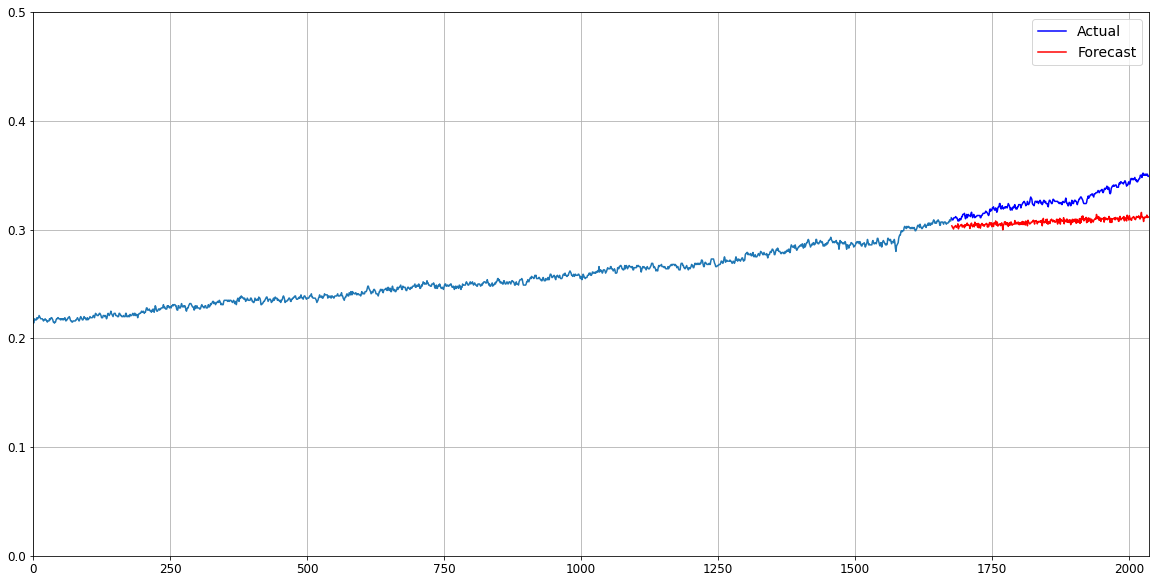

In [ ]:
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]


plt.figure(figsize=(20,10))
plot_multiple_forecasts(X_new, Y_new, Y_pred)